# Project 4

## Problem Statement

West Nile Virus (WNV) is the leading cause of mosquito-borne disease in the continental United States. It is most commonly spread to people by the bite of an infected mosquito. There are no vaccines to prevent or medications to treat WNV in people. Based on research ([Link](https://www.cdc.gov/westnile/index.html)), we understand that about 1 out of 150 infected people develop a serious, sometimes fatal, illness. Due to the recent epidemic of West Nile Virus in Chicago, the Department of Public Health has set up a surveillance and control system in which data on the mosquito population has been collected over time. We, as data scientists, have been engaged to analyze the collected data to investigate and predict the presence of WNV. We will also be doing a cost-benefit analysis in relation to the spraying of pesticides to control the spread of WNV.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from datetime import datetime, timedelta

from sklearn.cluster import KMeans

## Importing of Data

### Traps dataset

In [2]:
traps = pd.read_csv("./assets/train.csv")

In [3]:
traps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [4]:
traps.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


### Test Dataset

In [5]:
test_data = pd.read_csv("./assets/test.csv")

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [7]:
test_data.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


### Spray dataset

In [8]:
spray = pd.read_csv("./assets/spray.csv")

In [9]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [10]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


### Weather dataset

In [11]:
weather_data = pd.read_csv("./assets/weather.csv")

In [12]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [13]:
weather_data.head(30)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
5,2,2007-05-03,67,48,58,M,40,50,7,0,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
6,1,2007-05-04,66,49,58,4,41,50,7,0,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
7,2,2007-05-04,78,51,M,M,42,50,M,M,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,5,38,49,5,0,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0
9,2,2007-05-05,66,54,60,M,39,50,5,0,...,,M,M,M,T,29.46,30.09,11.2,7,11.5


## Data cleaning

### Train dataset

In [14]:
traps.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [15]:
traps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [16]:
# Change the "Date" column datatype to datetime
traps['Date'] = pd.to_datetime(traps['Date'])
traps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    10506 non-null  datetime64[ns]
 1   Address                 10506 non-null  object        
 2   Species                 10506 non-null  object        
 3   Block                   10506 non-null  int64         
 4   Street                  10506 non-null  object        
 5   Trap                    10506 non-null  object        
 6   AddressNumberAndStreet  10506 non-null  object        
 7   Latitude                10506 non-null  float64       
 8   Longitude               10506 non-null  float64       
 9   AddressAccuracy         10506 non-null  int64         
 10  NumMosquitos            10506 non-null  int64         
 11  WnvPresent              10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), ob

In [17]:
# To convert the index to Date
traps = traps.set_index('Date')

### Test dataset

In [18]:
test_data.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


In [20]:
# Change the "Date" column datatype to datetime
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      116293 non-null  int64         
 1   Date                    116293 non-null  datetime64[ns]
 2   Address                 116293 non-null  object        
 3   Species                 116293 non-null  object        
 4   Block                   116293 non-null  int64         
 5   Street                  116293 non-null  object        
 6   Trap                    116293 non-null  object        
 7   AddressNumberAndStreet  116293 non-null  object        
 8   Latitude                116293 non-null  float64       
 9   Longitude               116293 non-null  float64       
 10  AddressAccuracy         116293 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 9.8+ MB


### Spray dataset

In [21]:
spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [22]:
spray[spray['Time'].isna()]

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014
...,...,...,...,...
1609,2011-09-07,NaN,41.995876,-87.811615
1610,2011-09-07,NaN,41.995972,-87.810271
1611,2011-09-07,NaN,41.995684,-87.810319
1612,2011-09-07,NaN,41.994724,-87.810415


In [23]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [24]:
# Change the "Date" column datatype to datetime
spray['Date'] = pd.to_datetime(spray['Date'])
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14835 non-null  datetime64[ns]
 1   Time       14251 non-null  object        
 2   Latitude   14835 non-null  float64       
 3   Longitude  14835 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [25]:
# Change the "Time" column datatype to datetime
spray['Time'] = pd.to_datetime(spray['Time'])
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14835 non-null  datetime64[ns]
 1   Time       14251 non-null  datetime64[ns]
 2   Latitude   14835 non-null  float64       
 3   Longitude  14835 non-null  float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 463.7 KB


In [26]:
# To convert the index to Date
spray = spray.set_index('Date')

We noted that there were 584 rows in which there were NA values in the 'time' column. We will drop the 'time' column from the spray dataset.

In [27]:
spray.drop(columns=['Time'], inplace=True)

In [28]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14835 entries, 2011-08-29 to 2013-09-05
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   14835 non-null  float64
 1   Longitude  14835 non-null  float64
dtypes: float64(2)
memory usage: 347.7 KB


### Weather dataset

In [29]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

In [30]:
# Change the "Date" column datatype to datetime
weather_data['Date'] = pd.to_datetime(weather_data['Date'])
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   object        
 5   Depart       2944 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2944 non-null   object        
 8   Heat         2944 non-null   object        
 9   Cool         2944 non-null   object        
 10  Sunrise      2944 non-null   object        
 11  Sunset       2944 non-null   object        
 12  CodeSum      2944 non-null   object        
 13  Depth        2944 non-null   object        
 14  Water1       2944 non-null   object        
 15  SnowFall     2944 non-null   object        
 16  Precip

In [31]:
weather_data.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

Based on the null counts above, it seems that there are no missing values. However, we understand that based on the weather documentation,'M' is indicated for missing values and '-' for values not available for sunrise/sunset. Therefore, before we investigate the null values, we will first replace these values with nan.

In [32]:
weather_data=weather_data.replace('-', np.nan)
weather_data=weather_data.replace('M', np.nan)

In [33]:
weather_data.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [34]:
# To investigate on the Tavg column
weather_data['Tavg'].unique()

array(['67', '68', '51', '52', '56', '58', nan, '60', '59', '65', '70',
       '69', '71', '61', '55', '57', '73', '72', '53', '62', '63', '74',
       '75', '78', '76', '77', '66', '80', '64', '81', '82', '79', '85',
       '84', '83', '50', '49', '46', '48', '45', '54', '47', '44', '40',
       '41', '38', '39', '42', '37', '43', '86', '87', '89', '92', '88',
       '91', '93', '94', '90', '36'], dtype=object)

In [35]:
# To fill in the missing values for Tavg column
weather_data['Tavg'] = weather_data['Tavg'].fillna((weather_data['Tmin'] + weather_data['Tmax'])/2)

In [36]:
weather_data.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg              0
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [37]:
# To investigate on the Depart column
weather_data['Depart'].unique()

array(['14', nan, '-3', ' 2', ' 4', ' 5', '10', '12', '13', '-2', '15',
       '11', '-4', '-6', ' 8', '-5', ' 1', ' 9', ' 6', '-9', '-8', ' 3',
       ' 0', '-1', '-7', ' 7', '-14', '18', '16', '22', '21', '20', '-10',
       '-16', '17', '-12', '-11', '-15', '-17', '19', '-13', '23'],
      dtype=object)

We noted that the 'Depart' column indicates if the average temperatures were above or below the 30-year normal by subtracting the average air temperature from the 30-year normal. We are in the opinion that this column will have similar effects in relation to the temperature columns. Including that about 50% of the rows in this column is NA, we will drop this column from our analysis.

In [38]:
# To drop the Depart column
weather_data.drop(columns=['Depart'], inplace=True)

In [39]:
weather_data.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg              0
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [40]:
# To investigate on the WetBulb column
weather_data['WetBulb'].unique()

array(['56', '57', '47', '48', '50', '49', '46', '54', '53', '62', '63',
       '60', '61', '51', '59', '58', '43', '44', '45', '65', '66', '67',
       '64', '52', '55', '69', '68', '70', '72', '71', '73', '74', '76',
       '42', '39', '40', '41', '35', '33', '34', nan, '75', '36', '32',
       '38', '78', '77', '37'], dtype=object)

In [41]:
# It seems that the wet bulb temperature for both stations on same days are similar. Therefore, we will fill in the missing values as the same wet bulb temperatures of the corresponding station on the same day.
weather_data[weather_data['WetBulb'].isna()]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
848,1,2009-06-26,86,69,78,60,NaN,0,13,0418,...,,0,NaN,0.0,0.00,NaN,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73,57,NaN,0,8,0454,...,,0,NaN,0.0,0.00,NaN,30.08,5.3,5,6.5
2412,1,2013-08-11,81,60,71,61,NaN,0,6,0455,...,RA,0,NaN,0.0,0.01,29.35,30.07,2.0,27,3.0
2415,2,2013-08-12,85,69,77,63,NaN,0,12,NaN,...,RA,NaN,NaN,NaN,0.66,29.27,29.92,4.5,26,7.7


In [42]:
weather_data.iloc[[848, 849], :]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
848,1,2009-06-26,86,69,78,60,NaN,0,13,0418,...,,0,NaN,0.0,0.00,NaN,29.85,6.4,4,8.2
849,2,2009-06-26,86,72,79,61,67,0,14,NaN,...,,NaN,NaN,NaN,0.00,29.20,29.83,6.4,4,8.0


In [43]:
# To replace row 848 with the WetBulb temperature
weather_data.at[848, 'WetBulb']=67

In [44]:
weather_data.iloc[2410:2416, :]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
2410,1,2013-08-10,81,64,73,57,NaN,0,8,0454,...,,0,NaN,0.0,0.00,NaN,30.08,5.3,5,6.5
2411,2,2013-08-10,81,68,75,55,63,0,10,NaN,...,,NaN,NaN,NaN,0.00,NaN,30.07,6.0,6,7.4
2412,1,2013-08-11,81,60,71,61,NaN,0,6,0455,...,RA,0,NaN,0.0,0.01,29.35,30.07,2.0,27,3.0
2413,2,2013-08-11,84,63,74,57,64,0,9,NaN,...,,NaN,NaN,NaN,T,29.42,30.06,4.0,24,5.4
2414,1,2013-08-12,82,67,75,65,68,0,10,0456,...,RA DZ,0,NaN,0.0,0.27,29.21,29.93,3.5,27,7.5
2415,2,2013-08-12,85,69,77,63,NaN,0,12,NaN,...,RA,NaN,NaN,NaN,0.66,29.27,29.92,4.5,26,7.7


In [45]:
weather_data.at[2410, 'WetBulb']=63
weather_data.at[2412, 'WetBulb']=64
weather_data.at[2415, 'WetBulb']=68

In [46]:
weather_data.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg              0
DewPoint          0
WetBulb           0
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [47]:
# To investigate on the Heat column
weather_data['Heat'].unique()

array(['0', '14', '13', '9', '7', nan, '5', '6', '4', '10', '8', '12',
       '3', '2', '1', '15', '16', '19', '17', '20', '11', '18', '21',
       '25', '24', '27', '26', '23', '28', '22', '29'], dtype=object)

In [48]:
# It seems that the heat column for both stations on same days are similar. Therefore, we will fill in the missing values as the same heat values of the corresponding station on the same day.
weather_data[weather_data['Heat'].isna()]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,64.5,42,50,NaN,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66.0,68,71,NaN,NaN,NaN,...,TS RA,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54.0,41,47,NaN,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,85.5,70,74,NaN,NaN,NaN,...,TS TSRA BR,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78.0,51,61,NaN,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,56.5,39,45,NaN,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,71.5,48,54,NaN,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,68.5,48,54,NaN,NaN,NaN,...,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,62.0,44,50,NaN,NaN,NaN,...,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,63.5,43,47,NaN,NaN,NaN,...,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


In [49]:
# To replace the missing values with the corresponding station 1 heat values on the same day.
weather_data.at[7, 'Heat']=weather_data.at[6, 'Heat']
weather_data.at[505, 'Heat']=weather_data.at[504, 'Heat']
weather_data.at[675, 'Heat']=weather_data.at[674, 'Heat']
weather_data.at[1637, 'Heat']=weather_data.at[1636, 'Heat']
weather_data.at[2067, 'Heat']=weather_data.at[2066, 'Heat']
weather_data.at[2211, 'Heat']=weather_data.at[2210, 'Heat']
weather_data.at[2501, 'Heat']=weather_data.at[2500, 'Heat']
weather_data.at[2511, 'Heat']=weather_data.at[2510, 'Heat']
weather_data.at[2525, 'Heat']=weather_data.at[2524, 'Heat']
weather_data.at[2579, 'Heat']=weather_data.at[2578, 'Heat']
weather_data.at[2811, 'Heat']=weather_data.at[2810, 'Heat']

In [50]:
weather_data.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg              0
DewPoint          0
WetBulb           0
Heat              0
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [51]:
# It seems that the cool column for both stations on same days are similar. Therefore, we will fill in the missing values as the same cool values of the corresponding station on the same day.
weather_data[weather_data['Cool'].isna()]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,64.5,42,50,7,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,66.0,68,71,0,NaN,NaN,...,TS RA,NaN,NaN,NaN,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,54.0,41,47,11,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,85.5,70,74,0,NaN,NaN,...,TS TSRA BR,NaN,NaN,NaN,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,78.0,51,61,0,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.39,NaN,4.7,19,NaN
2211,2,2013-05-02,71,42,56.5,39,45,16,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,71.5,48,54,5,NaN,NaN,...,,NaN,NaN,NaN,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,68.5,48,54,5,NaN,NaN,...,RA BR,NaN,NaN,NaN,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,62.0,44,50,10,NaN,NaN,...,RA DZ BR,NaN,NaN,NaN,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,63.5,43,47,15,NaN,NaN,...,RA,NaN,NaN,NaN,0.04,29.10,29.79,10.7,23,11.9


In [52]:
weather_data.at[7, 'Cool']=weather_data.at[6, 'Cool']
weather_data.at[505, 'Cool']=weather_data.at[504, 'Cool']
weather_data.at[675, 'Cool']=weather_data.at[674, 'Cool']
weather_data.at[1637, 'Cool']=weather_data.at[1636, 'Cool']
weather_data.at[2067, 'Cool']=weather_data.at[2066, 'Cool']
weather_data.at[2211, 'Cool']=weather_data.at[2210, 'Cool']
weather_data.at[2501, 'Cool']=weather_data.at[2500, 'Cool']
weather_data.at[2511, 'Cool']=weather_data.at[2510, 'Cool']
weather_data.at[2525, 'Cool']=weather_data.at[2524, 'Cool']
weather_data.at[2579, 'Cool']=weather_data.at[2578, 'Cool']
weather_data.at[2811, 'Cool']=weather_data.at[2810, 'Cool']

In [53]:
weather_data.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg              0
DewPoint          0
WetBulb           0
Heat              0
Cool              0
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [54]:
# To investigate on the Sunrise columns
weather_data['Sunrise'].unique()

array(['0448', nan, '0447', '0446', '0444', '0443', '0442', '0441',
       '0439', '0438', '0437', '0436', '0435', '0434', '0433', '0432',
       '0431', '0430', '0429', '0428', '0427', '0426', '0425', '0424',
       '0423', '0422', '0421', '0420', '0419', '0418', '0417', '0416',
       '0440', '0445', '0449', '0450', '0451', '0452', '0453', '0454',
       '0455', '0456', '0457', '0458', '0459', '0500', '0501', '0502',
       '0503', '0504', '0505', '0506', '0508', '0509', '0510', '0511',
       '0512', '0513', '0514', '0515', '0516', '0517', '0518', '0519',
       '0520', '0521', '0522', '0523', '0524', '0525', '0526', '0527',
       '0528', '0529', '0530', '0531', '0532', '0533', '0535', '0536',
       '0537', '0538', '0539', '0540', '0541', '0542', '0543', '0544',
       '0545', '0546', '0547', '0548', '0549', '0550', '0552', '0553',
       '0554', '0555', '0556', '0557', '0558', '0559', '0600', '0602',
       '0603', '0604', '0605', '0606', '0607', '0608', '0610', '0611',
       '0

In [55]:
# grouping null values by station
weather_data[weather_data['Sunrise'].isnull()].groupby('Station').count()

,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Station,,,,,,,,,,,,,,,,,,,,
2,1472,1472,1472,1472,1472,1472,1472,1472,0,0,1472,0,0,0,1470,1470,1468,1472,1472,1469


Based on the statistics above, we noted that the missing values for 'Sunrise' and 'Sunset' columns are all from Station 2.

In [56]:
# To define a function to input sunrise and sunset values from station 1 to station 2
def impute_values(row):
    if row['Station'] == 2:
        row['Sunrise'] = weather_data[(weather_data['Date'] == row['Date']) & (weather_data['Station'] == 1)]['Sunrise'].values[0]
        row['Sunset'] = weather_data[(weather_data['Date'] == row['Date']) & (weather_data['Station'] == 1)]['Sunset'].values[0]
    return row

In [57]:
weather_data = weather_data.apply(impute_values, axis=1)

In [58]:
weather_data.isnull().sum()

Station           0
Date              0
Tmax              0
Tmin              0
Tavg              0
DewPoint          0
WetBulb           0
Heat              0
Cool              0
Sunrise           0
Sunset            0
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [59]:
# To investigate on the Depth column
weather_data['Depth'].unique()

array(['0', nan], dtype=object)

In [60]:
# To investigate on the Snowfall column
weather_data['SnowFall'].unique()

array(['0.0', nan, '  T', '0.1'], dtype=object)

For the Water1 column, it seems that it has missing values for all the rows in the dataframe. Therefore, we will drop this column from our dataframe. For the Depth column, it seems that there are only values of 0 and NA. Therefore, we will drop this column as it does not really provide much information. Similarly for the snowfall column, it seems that there are only values of 0, 0.1, T-trace and NA. Therefore, we will also drop this column as it does not really provide much information. 

In [61]:
# To drop the Water1, Depth and SnowFall columns
weather_data.drop(columns=['Water1', 'Depth', 'SnowFall'], inplace=True)

In [62]:
weather_data.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
PrecipTotal    2
StnPressure    4
SeaLevel       9
ResultSpeed    0
ResultDir      0
AvgSpeed       3
dtype: int64

In [63]:
# To investigate on the precipitation column
weather_data['PrecipTotal'].unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', nan, '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

In [64]:
weather_data[weather_data['PrecipTotal'].isna()]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
117,2,2007-06-28,73,61,67,56,61,0,2,0419,1931,,NaN,29.43,30.07,12.2,2,13.3
119,2,2007-06-29,71,56,64,56,60,1,0,0419,1931,,NaN,29.47,30.11,7.4,2,8.2


In [65]:
# We will input 0 for the 2 rows with NA value.
weather_data.at[117, 'PrecipTotal']=0.00
weather_data.at[119, 'PrecipTotal']=0.00

We also noted that there are rows in 'PrecipTotal' columns which are indicated as 'T', which means trace data. Based on our research ([Link](https://stateclimate.org/pdfs/journal-articles/2013_Adnan_et_al_2013.pdf)), we understand that trace is the amount of precipitation that is less than 0.005. To have an easier illustration, we will replace rows of 'T' value with 0.005.

In [66]:
weather_data["PrecipTotal"] = weather_data["PrecipTotal"].replace("  T","0.005")

In [67]:
# To check if all rows with 'T' has been replaced accordingly
weather_data[weather_data['PrecipTotal']== '  T']

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed


In [68]:
weather_data.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
PrecipTotal    0
StnPressure    4
SeaLevel       9
ResultSpeed    0
ResultDir      0
AvgSpeed       3
dtype: int64

In [69]:
# To investigate on the station pressure column
weather_data['StnPressure'].unique()

array(['29.10', '29.18', '29.38', '29.44', '29.39', '29.46', '29.31',
       '29.36', '29.40', '29.57', '29.62', '29.29', '29.21', '29.28',
       '29.20', '29.26', '29.33', '29.49', '29.54', '29.55', '29.23',
       '29.13', '29.19', '29.53', '29.60', '29.34', '29.41', '29.47',
       '29.51', '29.42', '29.43', '29.25', '29.03', '28.82', '28.87',
       '28.88', '29.16', '29.07', '28.84', '28.91', '29.24', nan, '29.30',
       '29.12', '29.45', '29.56', '29.32', '29.05', '29.11', '29.06',
       '29.22', '29.08', '29.14', '29.37', '29.35', '29.15', '29.17',
       '29.48', '29.52', '29.27', '29.50', '28.59', '28.67', '28.75',
       '29.02', '29.79', '29.86', '29.63', '29.70', '28.95', '29.01',
       '28.79', '28.85', '28.97', '28.89', '28.94', '28.93', '28.98',
       '28.96', '29.00', '29.66', '29.09', '28.90', '29.04', '29.59',
       '29.65', '29.58', '29.61', '29.64', '29.71', '29.67', '28.80',
       '28.73', '29.68', '28.74', '28.55', '28.63', '28.92', '28.99',
       '28.81',

In [70]:
# It seems that the station pressure column for both stations on same days are similar. Therefore, we will fill in the missing values as the same station pressure values of the corresponding station on the same day.
weather_data[weather_data['StnPressure'].isna()]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77,53,62,0,12,0416,1927,,0.00,NaN,NaN,7.0,5,NaN
848,1,2009-06-26,86,69,78,60,67,0,13,0418,1931,,0.00,NaN,29.85,6.4,4,8.2
2410,1,2013-08-10,81,64,73,57,63,0,8,0454,1900,,0.00,NaN,30.08,5.3,5,6.5
2411,2,2013-08-10,81,68,75,55,63,0,10,0454,1900,,0.00,NaN,30.07,6.0,6,7.4


In [71]:
weather_data.at[87, 'StnPressure']=weather_data.at[86, 'StnPressure']
weather_data.at[848, 'StnPressure']=weather_data.at[849, 'StnPressure']

In [72]:
# For the remaining 2 rows, we will use the median value to fill in the missing value.
weather_data['StnPressure'].fillna(weather_data['StnPressure'].median(), inplace=True)

In [73]:
weather_data.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
PrecipTotal    0
StnPressure    0
SeaLevel       9
ResultSpeed    0
ResultDir      0
AvgSpeed       3
dtype: int64

In [74]:
# To investigate on the sea level column
weather_data['SeaLevel'].unique()

array(['29.82', '30.09', '30.08', '30.12', '30.05', '30.04', '30.10',
       '30.29', '30.28', '30.03', '30.02', '29.94', '29.93', '29.92',
       '29.91', '30.20', '30.19', '30.24', '29.97', '29.98', '29.84',
       '29.83', '30.27', '30.25', '30.26', '30.11', '30.06', '30.23',
       '30.15', '30.14', '30.00', '29.99', '29.90', '29.77', '29.76',
       '29.56', '29.54', '29.52', '29.51', '29.79', '29.78', '29.81',
       '29.55', '29.85', '30.07', '30.16', nan, '29.96', '29.95', '30.13',
       '30.21', '30.22', '29.88', '30.01', '29.80', '29.89', '29.74',
       '29.87', '29.86', '30.18', '30.17', '29.34', '29.44', '29.45',
       '29.71', '29.72', '30.52', '30.53', '30.40', '30.41', '29.67',
       '29.53', '29.69', '29.61', '29.64', '29.63', '29.66', '29.70',
       '30.34', '30.33', '29.62', '29.60', '29.75', '29.68', '29.73',
       '30.31', '30.30', '30.32', '30.37', '30.39', '29.59', '29.65',
       '30.35', '30.36', '29.48', '30.38', '29.50', '29.25', '29.23',
       '29.46',

In [75]:
# It seems that the sea level column for both stations on same days are similar. Therefore, we will fill in the missing values as the same sea level values of the corresponding station on the same day.
weather_data[weather_data['SeaLevel'].isna()]

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
87,2,2007-06-13,86,68,77,53,62,0,12,0416,1927,,0.00,29.36,NaN,7.0,5,NaN
832,1,2009-06-18,80,61,71,63,67,0,6,0416,1929,RA BR,0.12,29.08,NaN,6.7,16,7.9
994,1,2009-09-07,77,59,68,59,62,0,3,0523,1817,BR,0.00,29.39,NaN,5.8,3,4.0
1732,1,2011-09-08,75,57,66,53,59,0,1,0524,1815,RA,0.005,29.34,NaN,13.0,2,13.4
1745,2,2011-09-14,60,48,54,45,51,11,0,0530,1805,RA BR HZ FU,0.005,29.47,NaN,6.0,32,NaN
1756,1,2011-09-20,74,49,62,54,58,3,0,0537,1753,MIFG BCFG BR,0.00,29.26,NaN,7.3,18,7.3
2067,2,2012-08-22,84,72,78.0,51,61,0,5,0506,1843,,0.00,29.39,NaN,4.7,19,NaN
2090,1,2012-09-03,88,71,80,70,73,0,15,0519,1824,BR,0.00,29.17,NaN,4.6,6,4.4
2743,2,2014-07-23,76,64,70,56,61,0,5,0436,1920,,0.00,29.47,NaN,16.4,2,16.7


In [76]:
# To replace the missing values for the sea level column.
weather_data.at[87, 'SeaLevel']=weather_data.at[86, 'SeaLevel']
weather_data.at[832, 'SeaLevel']=weather_data.at[833, 'SeaLevel']
weather_data.at[994, 'SeaLevel']=weather_data.at[995, 'SeaLevel']
weather_data.at[1732, 'SeaLevel']=weather_data.at[1733, 'SeaLevel']
weather_data.at[1745, 'SeaLevel']=weather_data.at[1744, 'SeaLevel']
weather_data.at[1756, 'SeaLevel']=weather_data.at[1757, 'SeaLevel']
weather_data.at[2067, 'SeaLevel']=weather_data.at[2066, 'SeaLevel']
weather_data.at[2090, 'SeaLevel']=weather_data.at[2091, 'SeaLevel']
weather_data.at[2743, 'SeaLevel']=weather_data.at[2742, 'SeaLevel']

In [77]:
weather_data.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       3
dtype: int64

In [78]:
# For the missing Avg Speed values, we will use the median value to fill in the missing values.
weather_data['AvgSpeed'].fillna(weather_data['AvgSpeed'].median(), inplace=True)

In [79]:
weather_data.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [80]:
weather_data.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,0,3,0448,1849,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,42,47,13,0,0447,1850,BR HZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,40,48,9,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9


It seems that although there are no missing values in the weather dataset, but if we observe the 'CodeSum' column, it seems that there are some 'missing' values. Based on the documentation provided, those which have no sign are considered moderate. Therefore, we will replace those 'missing' values with 'moderate' accordingly.

In [81]:
weather_data['CodeSum'] = weather_data['CodeSum'].replace('\s+', '', regex=True)

In [82]:
weather_data.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,0,3,0448,1849,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,42,47,13,0,0447,1850,BRHZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,40,48,9,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9


In [83]:
weather_data[weather_data['CodeSum'] == '']

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,0,3,0448,1849,,0.00,29.18,29.82,2.7,25,9.6
4,1,2007-05-03,66,46,56,40,48,9,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9
7,2,2007-05-04,78,51,64.5,42,50,7,0,0444,1852,,0.00,29.36,30.04,10.1,7,10.4
8,1,2007-05-05,66,53,60,38,49,5,0,0443,1853,,0.005,29.40,30.10,11.7,7,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,1,2014-10-27,77,51,64,51,58,1,0,0618,1653,,0.00,28.92,29.66,12.0,19,12.9
2936,1,2014-10-28,68,45,57,38,47,8,0,0619,1651,,0.005,29.15,29.85,14.8,26,15.6
2938,1,2014-10-29,49,36,43,32,40,22,0,0620,1650,,0.00,29.36,30.06,9.5,29,9.9
2939,2,2014-10-29,49,40,45,34,42,20,0,0620,1650,,0.00,29.42,30.07,8.5,29,9.0


In [84]:
weather_data['CodeSum'] = weather_data['CodeSum'].replace('', 'moderate')

In [85]:
weather_data['CodeSum'].unique()

array(['moderate', 'BR', 'BRHZ', 'HZ', 'RA', 'RABR', 'TSRARABR', 'RAVCTS',
       'TSRARA', 'RAHZ', 'TSRARABRHZ', 'TSRABRHZ', 'RABRHZVCTS',
       'TSRARAHZ', 'TSRABRHZVCTS', 'TSRA', 'TSRABRHZFU', 'TSRARAHZFU',
       'BRHZFU', 'TSRARAVCTS', 'HZVCTS', 'TSRAHZ', 'VCTS', 'RABRVCTS',
       'TSRARABRVCTS', 'TSTSRARABRHZVCTS', 'DZBR', 'TSTSRARABRHZ',
       'TSTSRABRHZ', 'RABRHZ', 'TSRARADZBRHZ', 'TSTSRARABR', 'TSRABR',
       'TSTSRARA', 'TSTSRARABRVCTS', 'TSTSRABR', 'RABCFGBR',
       'RADZFG+BCFGBR', 'RAFG+MIFGBR', 'RADZ', 'RADZBR', 'TSTSRARAHZ',
       'TSRARAFG+FGBR', 'TSRADZFG+FGBRHZ', 'TSBR', 'RABRSQ', 'TSTSRA',
       'TSRARABRHZVCTS', 'BRVCTS', 'TS', 'FG+BRHZ', 'RASN', 'TSRARADZBR',
       'DZBRHZ', 'RABRFU', 'TSBRHZ', 'DZ', 'FG+BR', 'FG+FGBR',
       'FG+MIFGBR', 'TSRARAFGBR', 'TSRAFG+BR', 'RADZBRHZ', 'RADZSN',
       'FG+FGBRHZ', 'TSTSRARAFGBR', 'BRHZVCFG', 'TSRAFG+FGBR',
       'TSRARAFG+BR', 'RADZFG+FGBR', 'TSTSRARAVCTS', 'FU', 'TSTSRAVCFG',
       'TSTSRAHZ', 'TSTSRAGRRABR', 

In [86]:
weather_data.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,0,2,0448,1849,moderate,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,51,57,0,3,0448,1849,moderate,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,42,47,13,0,0447,1850,BRHZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,40,48,9,0,0446,1851,moderate,0.00,29.39,30.12,11.7,7,11.9


In [87]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   object        
 5   DewPoint     2944 non-null   int64         
 6   WetBulb      2944 non-null   object        
 7   Heat         2944 non-null   object        
 8   Cool         2944 non-null   object        
 9   Sunrise      2944 non-null   object        
 10  Sunset       2944 non-null   object        
 11  CodeSum      2944 non-null   object        
 12  PrecipTotal  2944 non-null   object        
 13  StnPressure  2944 non-null   object        
 14  SeaLevel     2944 non-null   object        
 15  ResultSpeed  2944 non-null   float64       
 16  Result

In [88]:
# To convert object data types to int and float for applicable columns
weather_data['Tavg'] = weather_data['Tavg'].astype(int)
weather_data['WetBulb'] = weather_data['WetBulb'].astype(int)
weather_data['Heat'] = weather_data['Heat'].astype(int)
weather_data['Cool'] = weather_data['Cool'].astype(int)
weather_data["PrecipTotal"] = weather_data["PrecipTotal"].astype(float)
weather_data['StnPressure'] = weather_data['StnPressure'].astype(float)
weather_data['SeaLevel'] = weather_data['SeaLevel'].astype(float)
weather_data['AvgSpeed'] = weather_data['AvgSpeed'].astype(float)

In [89]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   int64         
 5   DewPoint     2944 non-null   int64         
 6   WetBulb      2944 non-null   int64         
 7   Heat         2944 non-null   int64         
 8   Cool         2944 non-null   int64         
 9   Sunrise      2944 non-null   object        
 10  Sunset       2944 non-null   object        
 11  CodeSum      2944 non-null   object        
 12  PrecipTotal  2944 non-null   float64       
 13  StnPressure  2944 non-null   float64       
 14  SeaLevel     2944 non-null   float64       
 15  ResultSpeed  2944 non-null   float64       
 16  Result

## EDA

## Locations of Traps and Infected Traps on Chicago Map

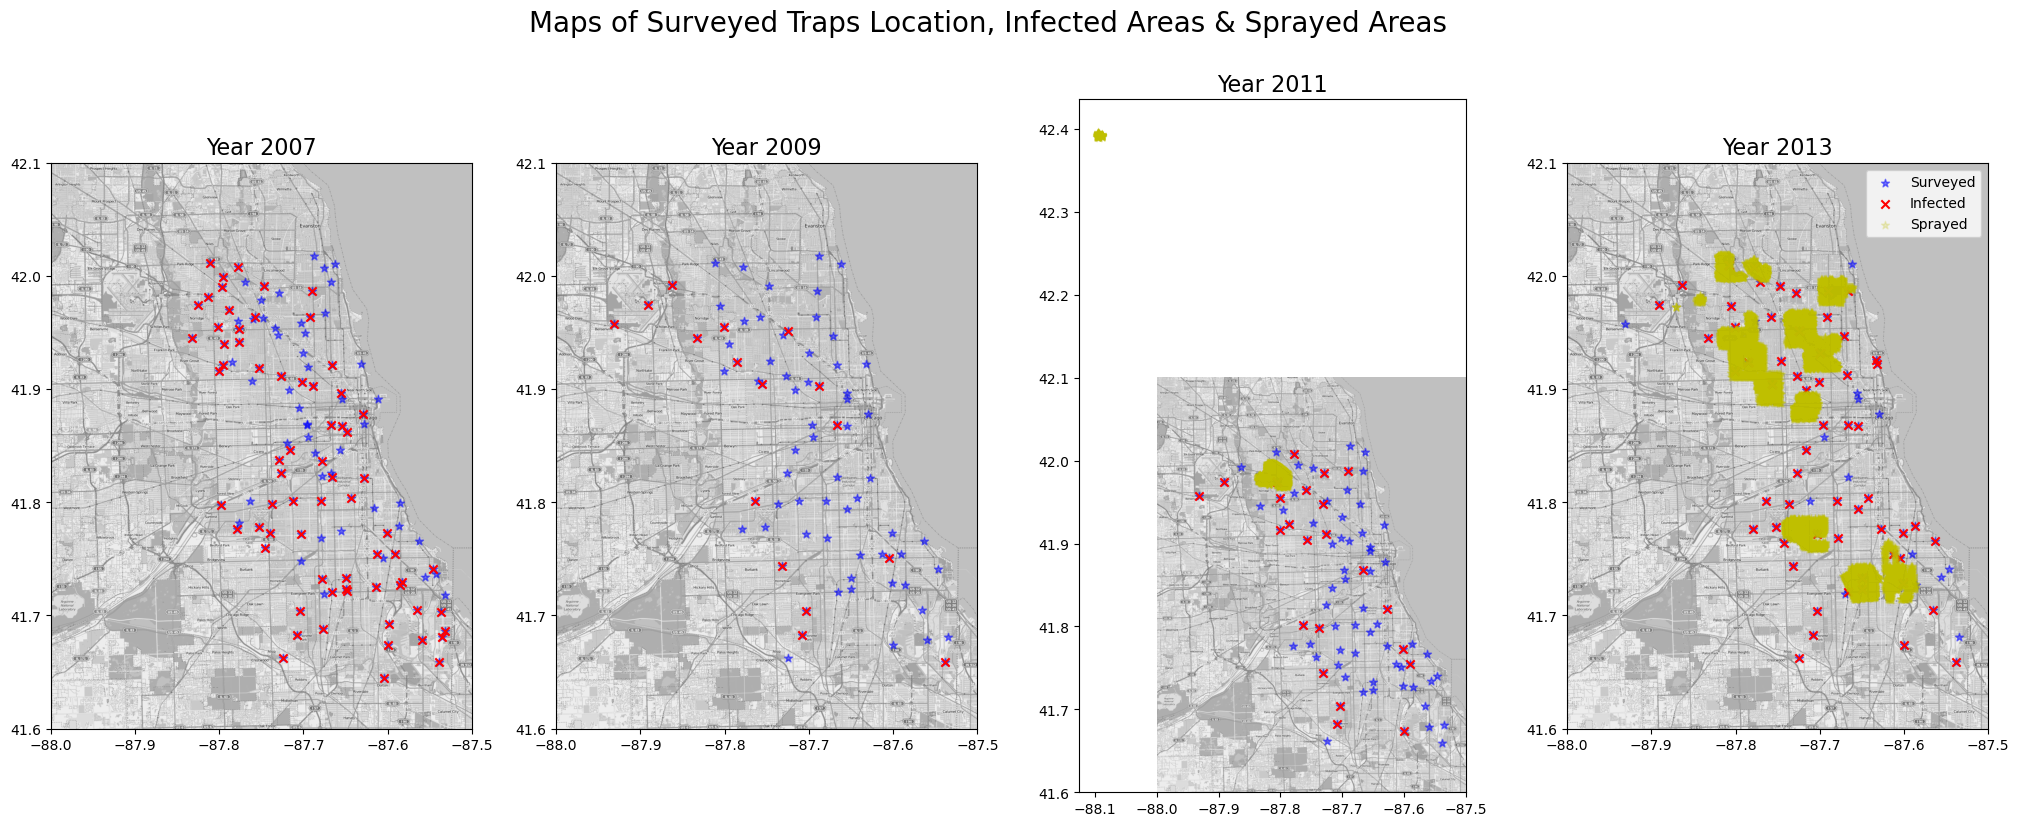

In [90]:
# Importing the map of Chicago
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

# Setting the map aspect and coordinates
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# To identify the number of year
year = traps.index.year.unique()
N = len(year)

# To set the figure size
fig, axs = plt.subplots(1, N, figsize=(25,9))

# Loop for maps to be shown in all subplots
for i in range(N):
    # To plot the base map
    axs[i].imshow(mapdata,
                  cmap=plt.get_cmap('gray'),
                  extent=lon_lat_box,
                  aspect=aspect)
    
    # To plot the survey location in blue
    traps_N = traps[['Longitude', 'Latitude', 'WnvPresent']]
    traps_N = traps_N[traps_N.index.year == year[i]]
    
    locations = traps_N[['Longitude', 'Latitude']].drop_duplicates().values
    axs[i].scatter(locations[:,0], locations[:,1], marker='*', color = 'b', label = 'Surveyed', alpha = 0.5 )
    
    # To plot the infected trap in red X
    traps_N_1 = traps_N[traps_N['WnvPresent'] == 1]
    traps_N_1 = traps_N_1[['Longitude', 'Latitude']].drop_duplicates().values
    axs[i].scatter(traps_N_1[:,0], traps_N_1[:,1], marker='x', color = 'r', label = 'Infected', alpha = 1)
    
    # To plot the spray area in yellow
    spray_i = spray[spray.index.year == year[i]]
    spray_i = spray_i[['Longitude', 'Latitude']].drop_duplicates().values
    axs[i].scatter(spray_i[:,0], spray_i[:,1], marker='*', color = 'y', label = 'Sprayed', alpha = 0.2)
    
    # To name the title of the subplot
    axs[i].set_title(f'Year {year[i]}', fontsize = 16)
    
    
fig.suptitle('Maps of Surveyed Traps Location, Infected Areas & Sprayed Areas', fontsize=20)
plt.legend()
plt.show()

We noted that there is one spray area in Year 2011 which is out of the map. Hence, we will remove this outlier.

In [91]:
# Since the spray is out of the Longitude and Latitude within our study area, 
# The outliers spray data will be removed.
spray = spray[spray['Longitude'] > - 88.0]

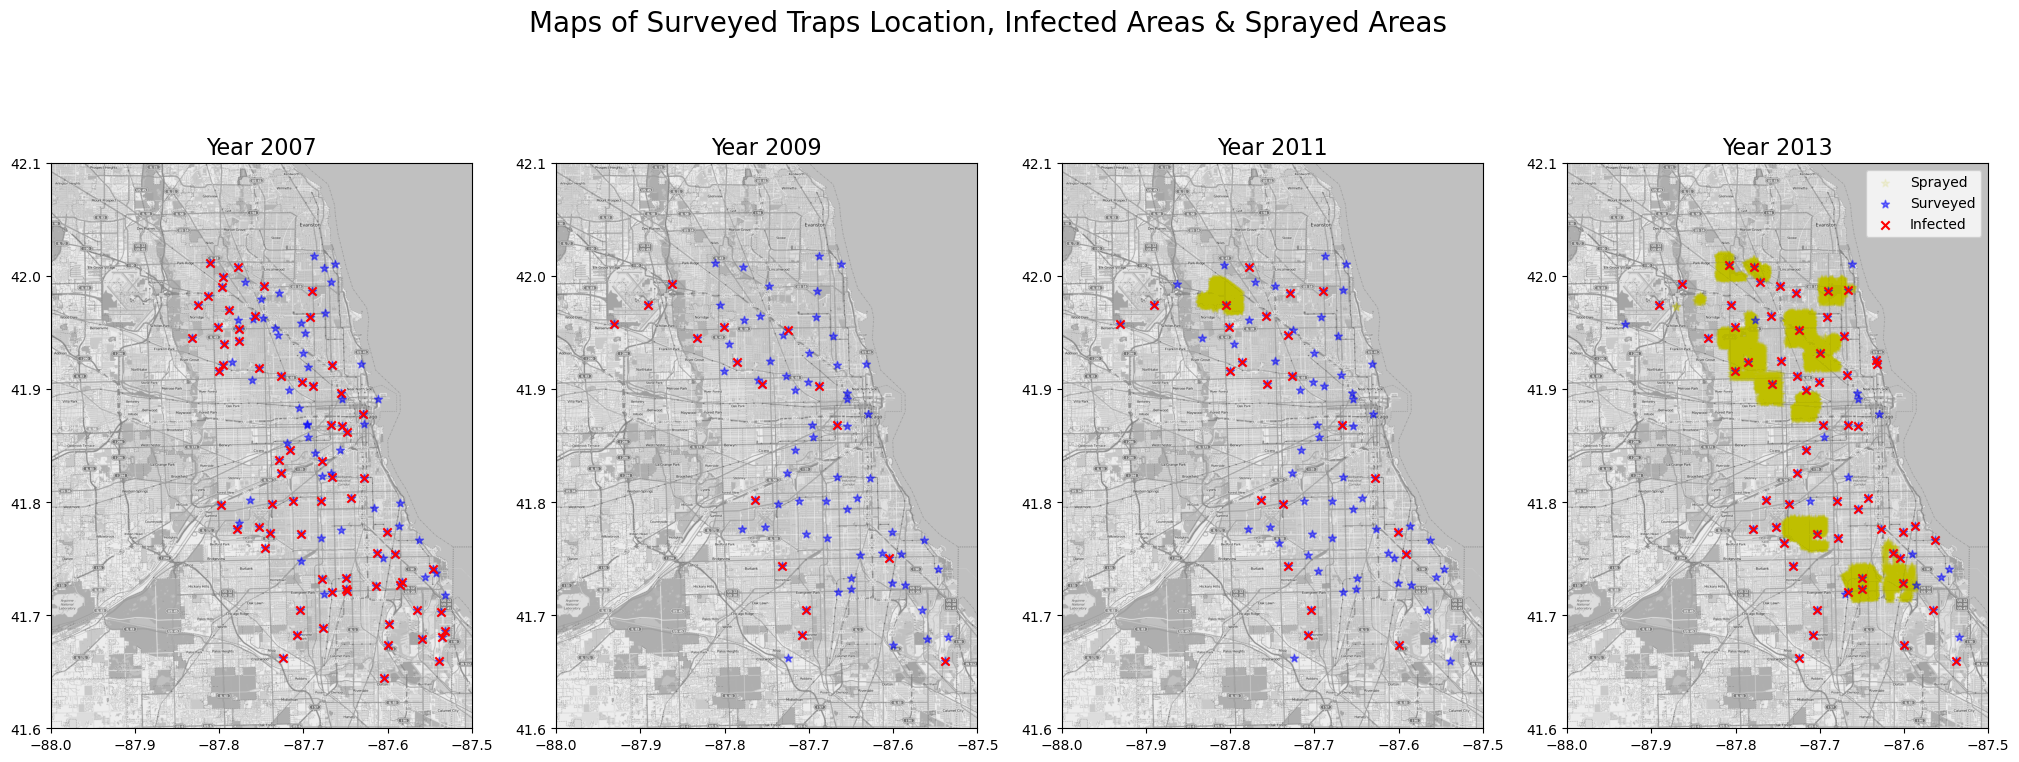

In [92]:
# Importing the map of Chicago
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")

# Setting the map aspect and coordinates
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# To identify the number of year
year = traps.index.year.unique()
N = len(year)

# To set the figure size
fig, axs = plt.subplots(1, N, figsize=(25,9))

# Loop for maps to be shown in all subplots
for i in range(N):
    # To plot the base map
    axs[i].imshow(mapdata,
                  cmap=plt.get_cmap('gray'),
                  extent=lon_lat_box,
                  aspect=aspect)
    
    # To plot the spray area in yellow
    spray_i = spray[spray.index.year == year[i]]
    spray_i = spray_i[['Longitude', 'Latitude']].drop_duplicates().values
    axs[i].scatter(spray_i[:,0], spray_i[:,1], marker='*', color = 'y', label = 'Sprayed', alpha = 0.1)
    
    # To plot the survey location in blue
    traps_N = traps[['Longitude', 'Latitude', 'WnvPresent']]
    traps_N = traps_N[traps_N.index.year == year[i]]
    
    locations = traps_N[['Longitude', 'Latitude']].drop_duplicates().values
    axs[i].scatter(locations[:,0], locations[:,1], marker='*', color = 'b', label = 'Surveyed', alpha = 0.5 )
    
    # To plot the infected trap in red X
    traps_N_1 = traps_N[traps_N['WnvPresent'] == 1]
    traps_N_1 = traps_N_1[['Longitude', 'Latitude']].drop_duplicates().values
    axs[i].scatter(traps_N_1[:,0], traps_N_1[:,1], marker='x', color = 'r', label = 'Infected', alpha = 1)
    
    
    
    # To name the title of the subplot
    axs[i].set_title(f'Year {year[i]}', fontsize = 16)
    
    
fig.suptitle('Maps of Surveyed Traps Location, Infected Areas & Sprayed Areas', fontsize=20)
plt.legend()
plt.show()

We noted that the number of traps has changed throughout the years and is not consistent. The number of traps surveyed are lesser comparing with Year 2007. Also, we could see that the number of infected traps are significantly lesser in Year 2009 and 2011 compared to Year 2007 and 2013.

We could also see that areas where spray occured, the WNV is still present. Hence, we could infer that the spray date is an important aspect of eliminating the WNV.

## Total Number of Traps Surveyed & Infected Traps by Year

In [93]:
# To create a new DataFrames with only selected features for plotting
traps_num = traps[['Trap', 'Longitude', 'Latitude', 'NumMosquitos', 'WnvPresent']]
traps_num_p = traps_num[traps_num['WnvPresent'] == 1].resample('Y').count()
traps_num = traps_num.resample('Y').count()

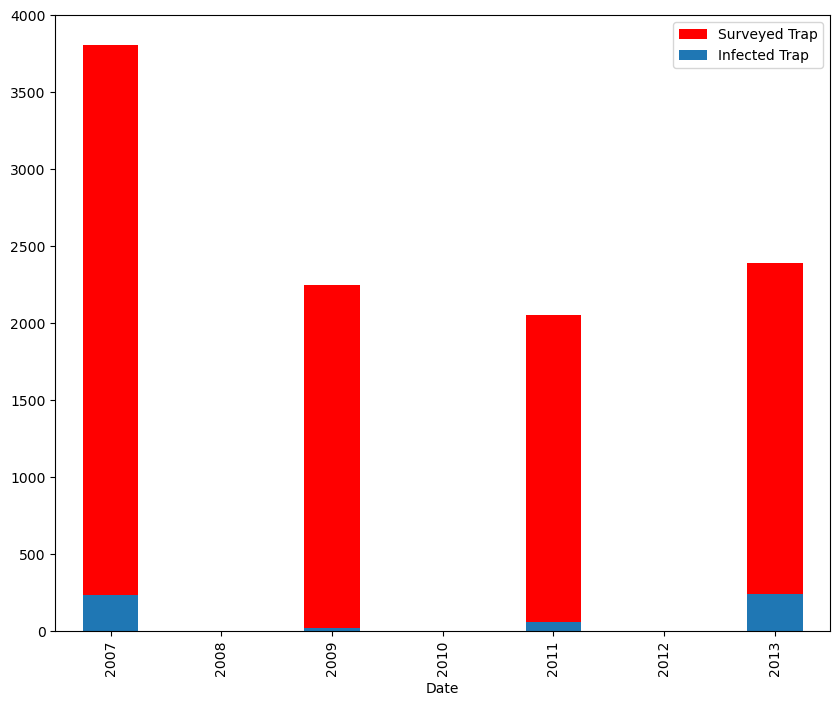

In [94]:
ax = plt.subplot(1,1,1)

traps_num.plot.bar(y='Trap', width=0.5, ax=ax, label = 'Surveyed Trap', color = 'red', figsize=(10, 8))
traps_num_p.plot.bar(y='Trap', width=0.5, ax=ax, label = 'Infected Trap', figsize=(10,8))
plt.xticks(range(len(traps_num_p.index)),
           [year.to_pydatetime().strftime("%Y") for year in traps_num_p.index],
           rotation=90, )

x = [datetime.date(t) for t in traps_num_p.index]  # convert the pandas datetime to matplotlib's
widths = [t1-t0 for t0, t1 in zip(x, x[1:])]  # time differences between dates
widths += [widths[-1]] # the very last bar didn't get a width, just repeat the last width
# ax.bar(x, traps_num_p['Trap'], width=widths, edgecolor='black')
plt.show()

We noted that the number of infected traps are higher in years 2007 and 2013 as compared to years 2009 and 2011.

## Number of Infected Traps over the Year

<BarContainer object of 13 artists>

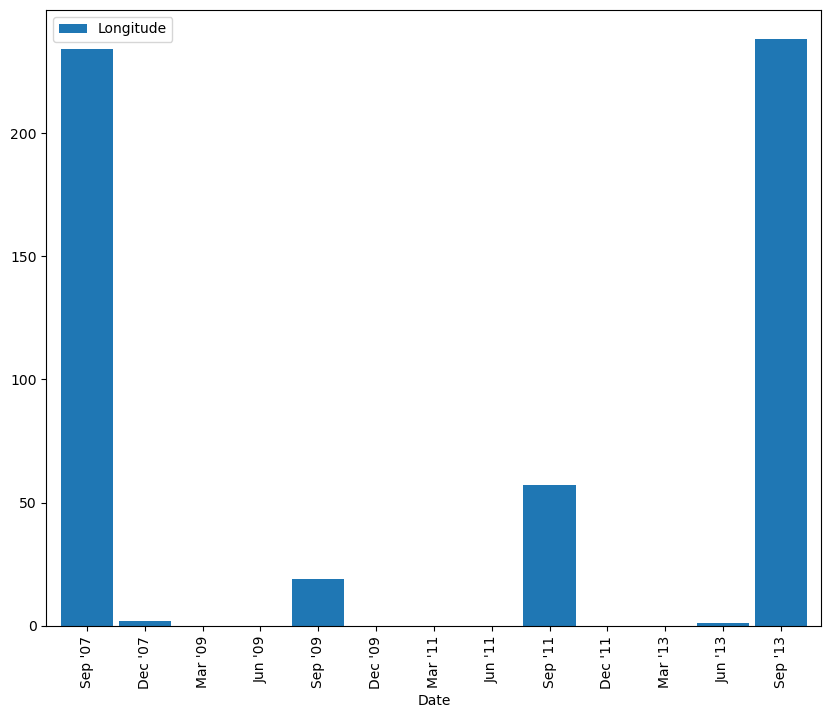

In [95]:
traps_Q = traps[['Longitude', 'Latitude', 'NumMosquitos', 'WnvPresent']]
traps_Q_1 = traps_Q[traps_Q['WnvPresent'] == 1]
traps_Q_1 = traps_Q_1[['Longitude', 'Latitude', 'NumMosquitos']]

Q_1 = pd.DataFrame()
traps_Q_1 = traps_Q_1.resample('Q').count()
for i in range(N):
    quarter_1 = traps_Q_1[traps_Q_1.index.year == year[i]]
    Q_1 = pd.concat([Q_1, quarter_1])
    
ax = plt.subplot(1,1,1)

Q_1.plot.bar(y='Longitude', width=0.9, ax=ax, figsize=(10,8))
plt.xticks(range(len(Q_1.index)),
           [t.to_pydatetime().strftime("%b '%y") for t in Q_1.index],
           rotation=90)

x = [datetime.date(t) for t in Q_1.index]  # convert the pandas datetime to matplotlib's
widths = [t1-t0 for t0, t1 in zip(x, x[1:])]  # time differences between dates
widths += [widths[-1]] # the very last bar didn't get a width, just repeat the last width
ax.bar(x, Q_1['Longitude'], width=widths, edgecolor='white')

## Number of Survey Done over the Year

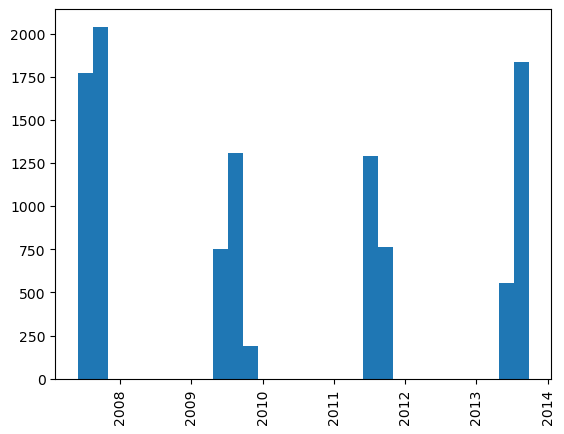

<Figure size 1000x800 with 0 Axes>

In [96]:
# To visualize on the timeframe of the posts from the datasets
plt.hist(traps.index, bins = 30)
plt.xticks(rotation = 90)
plt.figure(figsize=(10,8))
plt.show()

## Percentage of WNV present in dataset

In [97]:
# Percentage of WNV present
traps['WnvPresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: WnvPresent, dtype: float64

Based on the above statistic, we understand that there is an imbalanced class of data in which only about 5% of the data are WNV present.

## Mosquito count by species

In [98]:
mos_count = traps.groupby(['Species'])['Species'].count().sort_values(ascending=False)

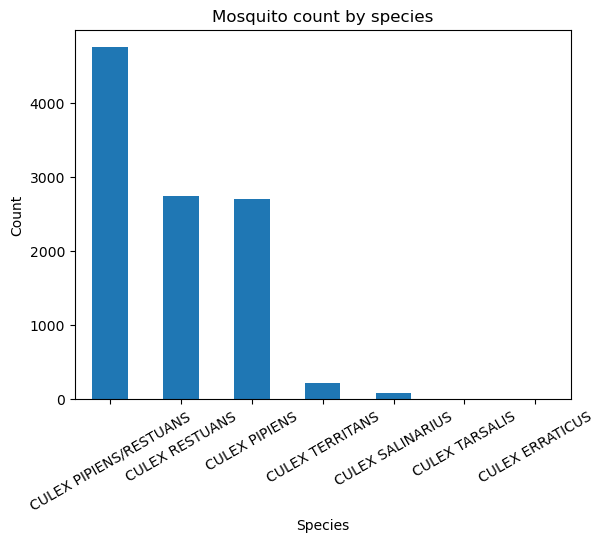

<Figure size 2500x1500 with 0 Axes>

In [99]:
# To plot a bar graph for mosquito species count
mos_count.plot(kind="bar", title="test")

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Mosquito count by species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.figure(figsize=(25, 15))
plt.show()

## Mosquitos species count carrying WNV virus

In [100]:
# Mosquito species carrying the WNV virus
mos_wnv = traps.loc[traps['WnvPresent']==1]['Species'].value_counts(ascending=False)

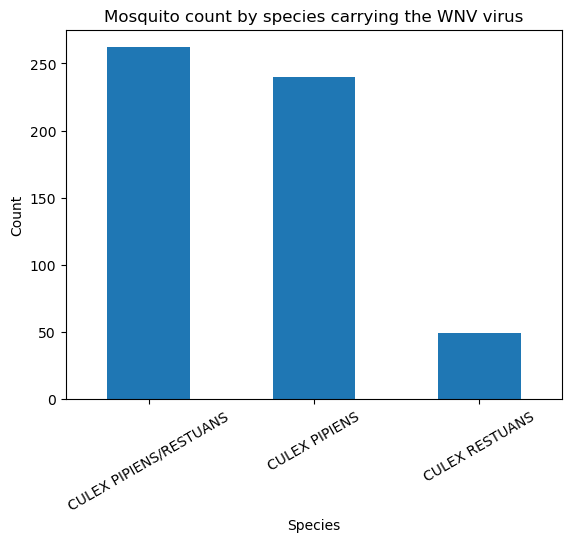

<Figure size 2500x1500 with 0 Axes>

In [101]:
# To plot a bar graph for mosquito species count carrying the WNV virus
mos_wnv.plot(kind="bar", title="test")

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Mosquito count by species carrying the WNV virus")
plt.xlabel("Species")
plt.ylabel("Count")
plt.figure(figsize=(25, 15))
plt.show()

We noted that there are only 3 species of mosquitoes (CULEX PIPIENS/RESTUANS, CULEX PIPIENS and CULEX RESTUANS) which are likely to cause the WNV.

## Occurrences of WNV based on year and month

In [102]:
traps['year'] = traps.index.year
traps['month'] = traps.index.month

In [103]:
wnv_by_month = pd.DataFrame(traps.groupby(['year','month'])['WnvPresent'].sum())

In [104]:
wnv_by_month_p = pd.pivot_table(data=wnv_by_month, index='year', columns='month')

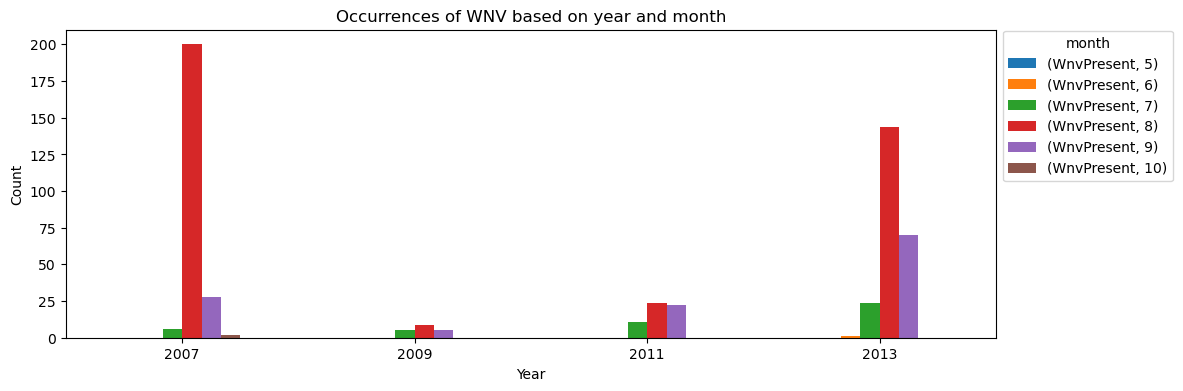

In [105]:
ax = wnv_by_month_p.plot(kind='bar', figsize=(12, 4), ylabel='Count', xlabel='Year', rot=0, title='Occurrences of WNV based on year and month')
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', title='month')

Based on the plot above, we noted that the occurrences of West Nile Virus is happening much more in the month of August for the 4 years of data.

## Count of mosquitos based on year and month

In [106]:
num_mos_by_month = pd.DataFrame(traps.groupby(['year','month'])['NumMosquitos'].sum())

In [107]:
num_mos_by_month_p = pd.pivot_table(data=num_mos_by_month, index='year', columns='month', values='NumMosquitos')

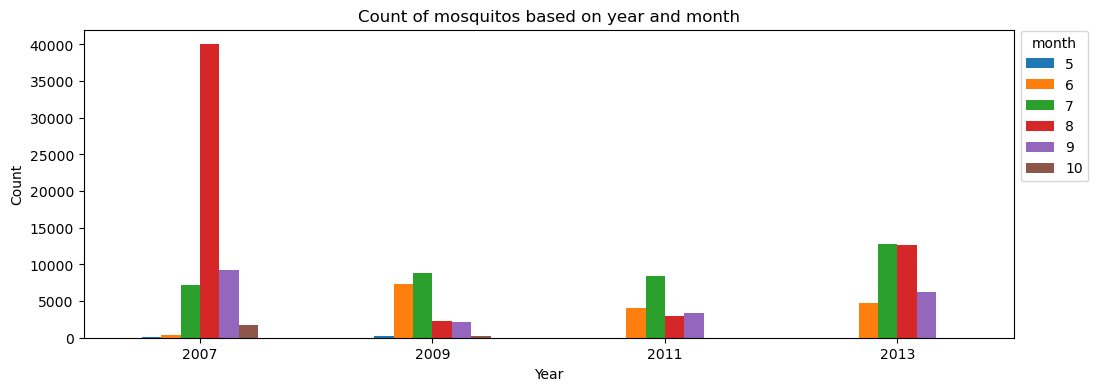

In [108]:
ax = num_mos_by_month_p.plot(kind='bar', figsize=(12, 4), ylabel='Count', xlabel='Year', rot=0, title='Count of mosquitos based on year and month')
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', title='month')

Based on the plot above, we can observe that the count of number of mosquitoes is the highest in August in 2007, highest in July in 2009, highest in July in 2011 and highest in both July and August in 2013.

## Mean average temperature based on year and month

In [109]:
weather_data['year'] = weather_data['Date'].dt.year
weather_data['month'] = weather_data['Date'].dt.month

In [110]:
years = [2007, 2009, 2011, 2013]

In [111]:
weather_data_1 = weather_data[weather_data['year'].isin(years)]

In [112]:
mean_avg_temp_by_month = pd.DataFrame(weather_data_1.groupby(['year','month'])['Tavg'].mean())

In [113]:
mean_avg_temp_by_month_p = pd.pivot_table(data=mean_avg_temp_by_month, index='year', columns='month', values='Tavg')

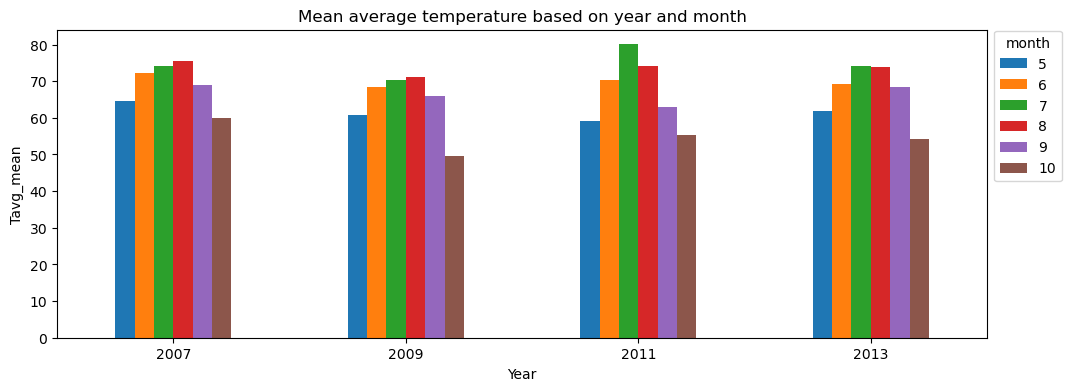

In [114]:
ax = mean_avg_temp_by_month_p.plot(kind='bar', figsize=(12, 4), ylabel='Tavg_mean', xlabel='Year', rot=0, title = 'Mean average temperature based on year and month')
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', title='month')

Based on the plot above, we can observe that the mean average temperatures are the highest in months of July and August across the 4 years. This means that July and August are the hottest months. If we compare it to the plots on occurrences of WNV and counts of mosquitos, it seems that the hot temperature conditions might have an influence in the higher number of mosquitos and higher occurrences of WNV in this 2 months.

## Dewpoint based on year and month

In [115]:
mean_dewpoint_by_month = pd.DataFrame(weather_data_1.groupby(['year','month'])['DewPoint'].mean())

In [116]:
mean_dewpoint_by_month_p = pd.pivot_table(data=mean_dewpoint_by_month, index='year', columns='month', values='DewPoint')

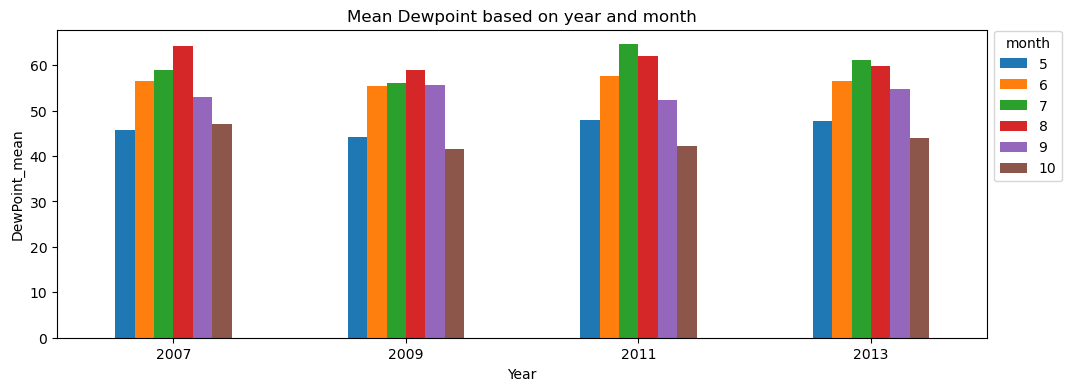

In [117]:
ax = mean_dewpoint_by_month_p.plot(kind='bar', figsize=(12, 4), ylabel='DewPoint_mean', xlabel='Year', rot=0, title='Mean Dewpoint based on year and month')
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', title='month')

We observe that there is a similar trend as compared to the mean average temperature. The mean dewpoint values are the highest in the months of July and August.

## Wetbulb based on year and month

In [118]:
mean_wetbulb_by_month = pd.DataFrame(weather_data_1.groupby(['year','month'])['WetBulb'].mean())

In [119]:
mean_wetbulb_by_month_p = pd.pivot_table(data=mean_wetbulb_by_month, index='year', columns='month', values='WetBulb')

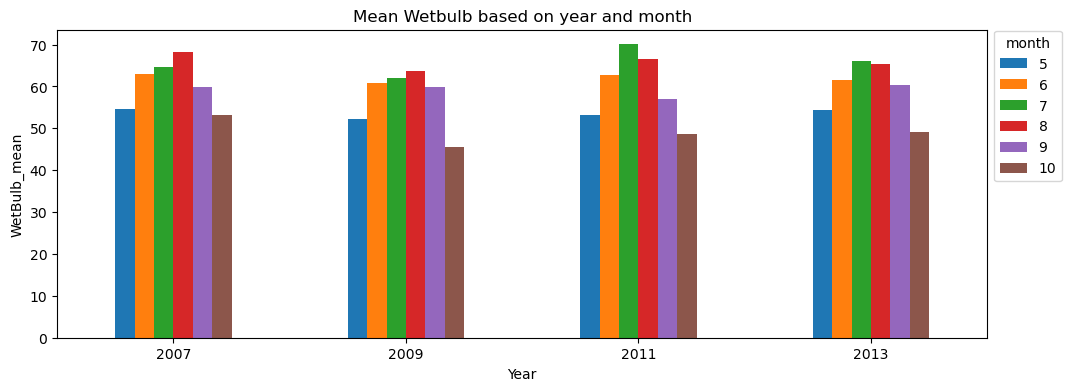

In [120]:
ax = mean_wetbulb_by_month_p.plot(kind='bar', figsize=(12, 4), ylabel='WetBulb_mean', xlabel='Year', rot=0, title='Mean Wetbulb based on year and month')
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', title='month')

We observe that there is a similar trend as compared to the mean average temperature. The mean wetbulb values are the highest in the months of July and August.

## Precipitation total based on year and month

In [121]:
mean_precip_by_month = pd.DataFrame(weather_data_1.groupby(['year','month'])['PrecipTotal'].mean())

In [122]:
mean_precip_by_month_p = pd.pivot_table(data=mean_precip_by_month, index='year', columns='month', values='PrecipTotal')

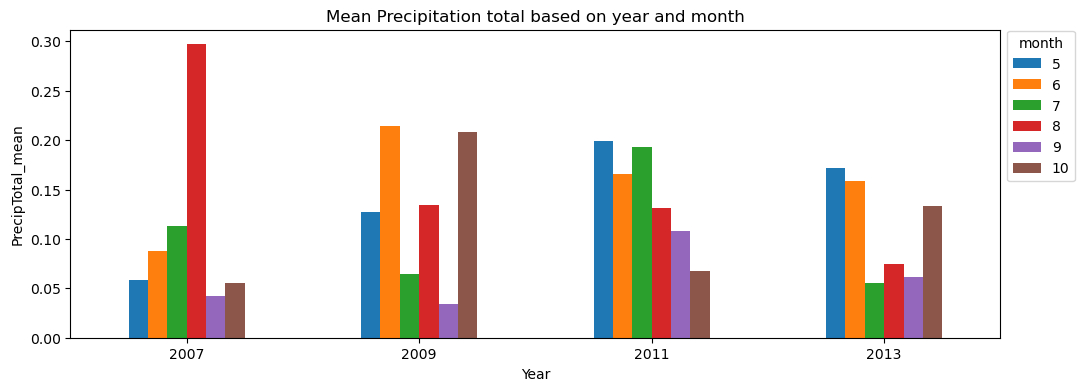

In [123]:
ax = mean_precip_by_month_p.plot(kind='bar', figsize=(12, 4), ylabel='PrecipTotal_mean', xlabel='Year', rot=0, title='Mean Precipitation total based on year and month')
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left', title='month')

We noted that there are no obvious trends over the 4 years in relation to precipitation total. We can see that there is 1 month in August 2007 which has a much higher precipitation as compared to the other periods.

## Merging of traps and weather dataset

In [124]:
# To calculate distance between two geo-locations
from math import sin, cos, sqrt, atan2, radians

def get_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

In [125]:
# To determine which station each location is nearer to
def which_station(row):
    lat = row['Latitude']
    lon = row['Longitude']
    station1_lat = 41.995
    station1_lon = -87.933
    station2_lat = 41.786
    station2_lon = -87.752

    if get_distance(lat, lon, station1_lat, station1_lon) < get_distance(
            lat, lon, station2_lat, station2_lon):
        return 1
    else:
        return 2

In [126]:
traps['Station'] = traps.apply(which_station, axis=1)

In [127]:
traps.head(10)

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,year,month,Station
Date,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,1
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,1
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,1
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,1
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,1
2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0,2007,5,2
2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",CULEX RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0,2007,5,2
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,2007,5,2
2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0,2007,5,2


In [128]:
merged_data= traps.merge(weather_data, on=['Date','Station'])

In [129]:
merged_data.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,year_y,month_y
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,1917,BRHZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,1917,BRHZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,1917,BRHZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,1917,BRHZ,0.0,29.39,30.11,5.8,18,6.5,2007,5
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,1917,BRHZ,0.0,29.39,30.11,5.8,18,6.5,2007,5


In [130]:
merged_data.to_csv('./assets/merged_data_clean.csv', index = False)

In [131]:
test_data['Station'] = test_data.apply(which_station, axis=1)

In [132]:
test_data.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,Station
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1


In [133]:
merged_test_data= test_data.merge(weather_data, on=['Date','Station'])

In [134]:
merged_test_data.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,year,month
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,1926,moderate,0.0,29.28,29.99,8.9,18,10.0,2008,6
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,1926,moderate,0.0,29.28,29.99,8.9,18,10.0,2008,6
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,1926,moderate,0.0,29.28,29.99,8.9,18,10.0,2008,6
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,1926,moderate,0.0,29.28,29.99,8.9,18,10.0,2008,6
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,...,1926,moderate,0.0,29.28,29.99,8.9,18,10.0,2008,6


In [135]:
merged_test_data.to_csv('./assets/merged_test_data_clean.csv', index = False)

In [136]:
spray.to_csv('./assets/spray_data_clean.csv', index = False)

In [137]:
traps.to_csv('./assets/train_data_clean.csv', index = False)

In [138]:
test_data.to_csv('./assets/test_data_clean.csv', index = False)

In [139]:
weather_data.to_csv('./assets/weather_data_clean.csv', index = False)